In [77]:
import numpy as np
import pandas as pd
from astropy.table import Table
from glob import glob
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.timeseries import LombScargle

In [78]:
df = pd.read_csv('../lightcurves/xrt/[LM2005]_NGC_3031_ULX1,curve_nosys_join.csv', dtype={'obsID':'str'})
df = df[df['Rate'] < 2]
df = df[df['UL'] == False]

In [79]:
tab = Table.read('../lightcurves/uvot/[LM2005]_NGC_3031_ULX1,UVOT_B.fits')
tab

MET,EXTNAME,TSTART,TSTOP,EXPOSURE,TELAPSE,TIME,SRC_AREA,BKG_AREA,STD_AREA,PLATE_SCALE,RAW_TOT_CNTS,RAW_TOT_CNTS_ERR,RAW_BKG_CNTS,RAW_BKG_CNTS_ERR,RAW_STD_CNTS,RAW_STD_CNTS_ERR,RAW_TOT_RATE,RAW_TOT_RATE_ERR,RAW_BKG_RATE,RAW_BKG_RATE_ERR,RAW_STD_RATE,RAW_STD_RATE_ERR,COI_STD_FACTOR,COI_STD_FACTOR_ERR,COI_BKG_FACTOR,COI_BKG_FACTOR_ERR,COI_TOT_RATE,COI_TOT_RATE_ERR,COI_BKG_RATE,COI_BKG_RATE_ERR,COI_SRC_RATE,COI_SRC_RATE_ERR,AP_FACTOR,AP_FACTOR_ERR,AP_COI_SRC_RATE,AP_COI_SRC_RATE_ERR,LSS_FACTOR,LSS_RATE,LSS_RATE_ERR,SENSCORR_FACTOR,SENSCORR_RATE,SENSCORR_RATE_ERR,CORR_RATE,CORR_RATE_ERR,AB_MAG,AB_MAG_ERR,AB_MAG_ERR_STAT,AB_MAG_ERR_SYS,AB_MAG_BKG,AB_MAG_BKG_ERR_STAT,AB_MAG_BKG_ERR_SYS,AB_MAG_BKG_ERR,AB_MAG_LIM,AB_MAG_LIM_SIG,AB_MAG_COI_LIM,AB_FLUX_AA,AB_FLUX_AA_ERR_STAT,AB_FLUX_AA_ERR_SYS,AB_FLUX_AA_ERR,AB_FLUX_AA_BKG,AB_FLUX_AA_BKG_ERR_STAT,AB_FLUX_AA_BKG_ERR_SYS,AB_FLUX_AA_BKG_ERR,AB_FLUX_AA_LIM,AB_FLUX_AA_COI_LIM,AB_FLUX_HZ,AB_FLUX_HZ_ERR_STAT,AB_FLUX_HZ_ERR_SYS,AB_FLUX_HZ_ERR,AB_FLUX_HZ_BKG,AB_FLUX_HZ_BKG_ERR_STAT,AB_FLUX_HZ_BKG_ERR_SYS,AB_FLUX_HZ_BKG_ERR,AB_FLUX_HZ_LIM,AB_FLUX_HZ_COI_LIM,MAG,MAG_ERR,MAG_ERR_STAT,MAG_ERR_SYS,MAG_BKG,MAG_BKG_ERR_STAT,MAG_BKG_ERR_SYS,MAG_BKG_ERR,MAG_LIM,MAG_LIM_SIG,MAG_COI_LIM,FLUX_AA,FLUX_AA_ERR_STAT,FLUX_AA_ERR_SYS,FLUX_AA_ERR,FLUX_AA_BKG,FLUX_AA_BKG_ERR_STAT,FLUX_AA_BKG_ERR_SYS,FLUX_AA_BKG_ERR,FLUX_AA_LIM,FLUX_AA_COI_LIM,FLUX_HZ,FLUX_HZ_ERR_STAT,FLUX_HZ_ERR_SYS,FLUX_HZ_ERR,FLUX_HZ_BKG,FLUX_HZ_BKG_ERR_STAT,FLUX_HZ_BKG_ERR_SYS,FLUX_HZ_BKG_ERR,FLUX_HZ_LIM,FLUX_HZ_COI_LIM,COI_RATE_LIMIT,CORR_RATE_LIMIT,FILTER,RA,DEC,DETX,DETY,NSIGMA,FRAMTIME,SATURATED,SYS_ERR,SRCEXP,BKGEXP,OBSID
s,,s,s,s,s,s,arcsec2,arcsec2,arcsec2,arcsec / pix,ct,ct,ct,ct,ct,ct,ct / s,ct / s,ct / (arcsec2 s),ct / (arcsec2 s),ct / s,ct / s,,,,,ct / s,ct / s,ct / (arcsec2 s),ct / (arcsec2 s),ct / s,ct / s,,,ct / s,ct / s,,ct / s,ct / s,,ct / s,ct / s,ct / s,ct / s,mag,mag,mag,mag,mag / arcsec2,mag / arcsec2,mag / arcsec2,mag / arcsec2,mag,sigma,mag,erg / (A cm2 s),erg / (A cm2 s),erg / (A cm2 s),erg / (A cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A cm2 s),erg / (A cm2 s),mjy,mjy,mjy,mjy,mjy/arcsec2,mjy/arcsec2,mjy/arcsec2,mjy/arcsec2,mjy,mjy,mag,mag,mag,mag,mag / arcsec2,mag / arcsec2,mag / arcsec2,mag / arcsec2,mag,sigma,mag,erg / (A cm2 s),erg / (A cm2 s),erg / (A cm2 s),erg / (A cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A cm2 s),erg / (A cm2 s),mjy,mjy,mjy,mjy,mjy/arcsec2,mjy/arcsec2,mjy/arcsec2,mjy/arcsec2,mjy,mjy,ct / s,ct / s,,deg,deg,pix,pix,,s,,,s,s,
float64,bytes12,float64,float64,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,float64,float64,float32,float32,float32,float32,int16,bool,float32,float32,bytes11
422160728.90046,B,422160690.01494,422160767.78598,76.54443,77.77104,0.0,78.499245,706.83997,78.499245,1.004,489.003,21.332653,1923.835,43.17885,489.003,21.332653,6.3884854,0.27869633,0.035557654,0.00079806143,6.3884854,0.27869633,1.0406778,0.047071066,1.0174146,0.023190033,6.648355,0.30071282,0.036176875,0.0008245832,3.8084977,0.3076005,1.0000299,1.0259365,3.8086116,0.31557858,1.0,3.8086116,0.31557858,1

<ErrorbarContainer object of 3 artists>

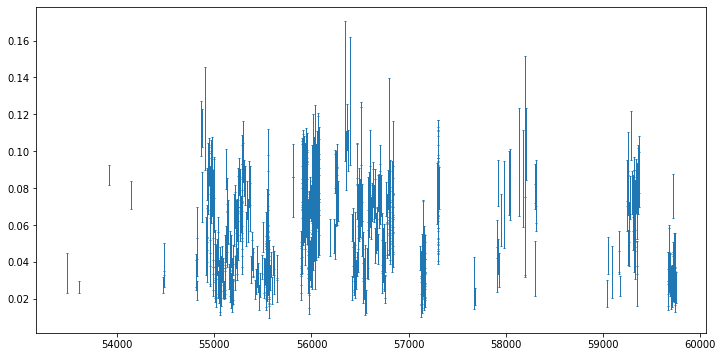

In [80]:
plt.figure(figsize=(12,6))
plt.errorbar(df['MJD'], df['Rate'], yerr=(df['Rateneg'].abs(), df['Ratepos']), ls='none', capsize=1.0, lw=1.0)

In [90]:
def get_n_largest_vals(arr, n):
    """ Get n largest values and idx
    of an array"""

    temp = np.argpartition(-arr, n)
    idx = temp[:4]

    temp = np.partition(-arr, n)
    vals = -temp[:4]
    return idx, vals

In [91]:
t, y, y_err = df['MJD'].values, df['Rate'].values, 2*df['Ratepos'].values

In [173]:
max_period  = 300
min_period  = 10
min_freq    = 1 / max_period
max_freq    = 1 / min_period
ls          = LombScargle(t=t, y=y, dy=y_err)
freq, power = ls.autopower(minimum_frequency=min_freq, maximum_frequency=max_freq)
period      = 1/freq

prob_labels   = ['$4 \sigma$']
probabilities = [sig_4]
fal_boot      = ls.false_alarm_level(probabilities, method='bootstrap')

In [174]:
ids, powers =  get_n_largest_vals(power, 10)
peak_idxs, peak_pow = find_peaks(power, height=fal_boot[1])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
peak_pow

In [ ]:
sig_3 = 1 - 0.997300203936740
sig_4 = 1 - 0.999936657516334


In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(period, power, color='green')



for i in range(len(fal_boot)):
    f = fal_baleuv[i]
    ax.text(10, f, s=f'{prob_labels[i]} FAP')
    ax.axhline(f, color='green', ls='dotted')


for i in range(len(peak_idxs)):
    
    idx = peak_idxs[i]
    pow = peak_pow['peak_heights'][i]
    fap = ls.false_alarm_probability(pow, method='baluev')
    
    p   = period[idx]
    ax.scatter(p, pow, marker='x')
    ax.text(p+1, pow, s=f'{period[idx]:.2f} days')
ax.set_xlim(min(period), max(period))